In [10]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.optimizers import Adam

In [4]:
tokenizer = Tokenizer()
data="In the town of Athy one Jeremy Lanigan \n Battered away til he hadnt a pound. \nHis father died and made him a man again \n Left him a farm and ten acres of ground. \nHe gave a grand party for friends and relations \nWho didnt forget him when come to the wall, \nAnd if youll but listen Ill make your eyes glisten \nOf the rows and the ructions of Lanigans Ball. \nMyself to be sure got free invitation, \nFor all the nice girls and boys I might ask, \nAnd just in a minute both friends and relations \nWere dancing round merry as bees round a cask. \nJudy ODaly, that nice little milliner, \nShe tipped me a wink for to give her a call, \nAnd I soon arrived with Peggy McGilligan \nJust in time for Lanigans Ball. \nThere were lashings of punch and wine for the ladies, \nPotatoes and cakes; there was bacon and tea, \nThere were the Nolans, Dolans, OGradys \nCourting the girls and dancing away. \nSongs they went round as plenty as water, \nThe harp that once sounded in Taras old hall,\nSweet Nelly Gray and The Rat Catchers Daughter,\nAll singing together at Lanigans Ball. \nThey were doing all kinds of nonsensical polkas \nAll round the room in a whirligig. \nJulia and I, we banished their nonsense \nAnd tipped them the twist of a reel and a jig. \nAch mavrone, how the girls got all mad at me \nDanced til youd think the ceiling would fall. \nFor I spent three weeks at Brooks Academy \nLearning new steps for Lanigans Ball. \nThree long weeks I spent up in Dublin, \nThree long weeks to learn nothing at all,\n Three long weeks I spent up in Dublin, \nLearning new steps for Lanigans Ball. \nShe stepped out and I stepped in again, \nI stepped out and she stepped in again, \nShe stepped out and I stepped in again, \nLearning new steps for Lanigans Ball. \nBoys were all merry and the girls they were hearty \nAnd danced all around in couples and groups, \nTil an accident happened, young Terrance McCarthy \nPut his right leg through miss Finnertys hoops. \nPoor creature fainted and cried Meelia murther, \nCalled for her brothers and gathered them all. \nCarmody swore that hed go no further \nTil he had satisfaction at Lanigans Ball. \nIn the midst of the row miss Kerrigan fainted, \nHer cheeks at the same time as red as a rose. \nSome of the lads declared she was painted, \nShe took a small drop too much, I suppose. \nHer sweetheart, Ned Morgan, so powerful and able, \nWhen he saw his fair colleen stretched out by the wall, \nTore the left leg from under the table \nAnd smashed all the Chaneys at Lanigans Ball. \nBoys, oh boys, twas then there were runctions. \nMyself got a lick from big Phelim McHugh. \nI soon replied to his introduction \nAnd kicked up a terrible hullabaloo. \nOld Casey, the piper, was near being strangled. \nThey squeezed up his pipes, bellows, chanters and all. \nThe girls, in their ribbons, they got all entangled \nAnd that put an end to Lanigans Ball."
corpus = data.lower().split("\n")

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(total_words)

{'and': 1, 'the': 2, 'a': 3, 'in': 4, 'all': 5, 'i': 6, 'for': 7, 'of': 8, 'lanigans': 9, 'ball': 10, 'were': 11, 'at': 12, 'to': 13, 'she': 14, 'stepped': 15, 'his': 16, 'girls': 17, 'as': 18, 'they': 19, 'til': 20, 'he': 21, 'again': 22, 'got': 23, 'boys': 24, 'round': 25, 'that': 26, 'her': 27, 'there': 28, 'three': 29, 'weeks': 30, 'up': 31, 'out': 32, 'him': 33, 'was': 34, 'spent': 35, 'learning': 36, 'new': 37, 'steps': 38, 'long': 39, 'away': 40, 'left': 41, 'friends': 42, 'relations': 43, 'when': 44, 'wall': 45, 'myself': 46, 'nice': 47, 'just': 48, 'dancing': 49, 'merry': 50, 'tipped': 51, 'me': 52, 'soon': 53, 'time': 54, 'old': 55, 'their': 56, 'them': 57, 'danced': 58, 'dublin': 59, 'an': 60, 'put': 61, 'leg': 62, 'miss': 63, 'fainted': 64, 'from': 65, 'town': 66, 'athy': 67, 'one': 68, 'jeremy': 69, 'lanigan': 70, 'battered': 71, 'hadnt': 72, 'pound': 73, 'father': 74, 'died': 75, 'made': 76, 'man': 77, 'farm': 78, 'ten': 79, 'acres': 80, 'ground': 81, 'gave': 82, 'grand':

In [6]:
input_sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)
    
# pad sequences
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len,
                                         padding='pre'))

# create predictors and label
xs, labels = input_sequences[:, :-1], input_sequences[:, -1]
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [8]:
model = Sequential()
model.add(Embedding(total_words, 64, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(20)))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
history = model.fit(xs, ys, epochs=500, verbose=1)

Epoch 1/500
15/15 [==============================] - 3s 6ms/step - loss: 5.5686 - accuracy: 0.0242
Epoch 2/500
15/15 [==============================] - 0s 6ms/step - loss: 5.5375 - accuracy: 0.0713
Epoch 3/500
15/15 [==============================] - 0s 6ms/step - loss: 5.4755 - accuracy: 0.0502
Epoch 4/500
15/15 [==============================] - 0s 6ms/step - loss: 5.2955 - accuracy: 0.0356
Epoch 5/500
15/15 [==============================] - 0s 6ms/step - loss: 5.0881 - accuracy: 0.0513
Epoch 6/500
15/15 [==============================] - 0s 6ms/step - loss: 5.1076 - accuracy: 0.0356
Epoch 7/500
15/15 [==============================] - 0s 6ms/step - loss: 5.0187 - accuracy: 0.0586
Epoch 8/500
15/15 [==============================] - 0s 6ms/step - loss: 5.0842 - accuracy: 0.0540
Epoch 9/500
15/15 [==============================] - 0s 6ms/step - loss: 5.0642 - accuracy: 0.0369
Epoch 10/500
15/15 [==============================] - 0s 6ms/step - loss: 4.9119 - accuracy: 0.0681
Epoch 11/

15/15 [==============================] - 0s 6ms/step - loss: 2.1305 - accuracy: 0.5998
Epoch 84/500
15/15 [==============================] - 0s 6ms/step - loss: 2.1108 - accuracy: 0.6060
Epoch 85/500
15/15 [==============================] - 0s 6ms/step - loss: 2.0807 - accuracy: 0.6292
Epoch 86/500
15/15 [==============================] - 0s 6ms/step - loss: 2.0307 - accuracy: 0.6301
Epoch 87/500
15/15 [==============================] - 0s 6ms/step - loss: 1.9300 - accuracy: 0.6911
Epoch 88/500
15/15 [==============================] - 0s 6ms/step - loss: 2.0225 - accuracy: 0.6488
Epoch 89/500
15/15 [==============================] - 0s 6ms/step - loss: 1.9993 - accuracy: 0.6520
Epoch 90/500
15/15 [==============================] - 0s 6ms/step - loss: 1.8930 - accuracy: 0.6940
Epoch 91/500
15/15 [==============================] - 0s 6ms/step - loss: 1.8964 - accuracy: 0.6990
Epoch 92/500
15/15 [==============================] - 0s 6ms/step - loss: 1.8471 - accuracy: 0.7116
Epoch 93/500


15/15 [==============================] - 0s 6ms/step - loss: 0.8559 - accuracy: 0.8809
Epoch 165/500
15/15 [==============================] - 0s 6ms/step - loss: 0.8515 - accuracy: 0.8868
Epoch 166/500
15/15 [==============================] - 0s 6ms/step - loss: 0.8435 - accuracy: 0.8860
Epoch 167/500
15/15 [==============================] - 0s 5ms/step - loss: 0.7868 - accuracy: 0.8852
Epoch 168/500
15/15 [==============================] - 0s 5ms/step - loss: 0.8368 - accuracy: 0.8736
Epoch 169/500
15/15 [==============================] - 0s 6ms/step - loss: 0.8228 - accuracy: 0.8844
Epoch 170/500
15/15 [==============================] - 0s 6ms/step - loss: 0.7769 - accuracy: 0.9051
Epoch 171/500
15/15 [==============================] - 0s 6ms/step - loss: 0.7912 - accuracy: 0.8984
Epoch 172/500
15/15 [==============================] - 0s 5ms/step - loss: 0.6930 - accuracy: 0.9275
Epoch 173/500
15/15 [==============================] - 0s 5ms/step - loss: 0.7837 - accuracy: 0.9020
Epoc

15/15 [==============================] - 0s 6ms/step - loss: 0.3691 - accuracy: 0.9533
Epoch 246/500
15/15 [==============================] - 0s 6ms/step - loss: 0.3978 - accuracy: 0.9426
Epoch 247/500
15/15 [==============================] - 0s 6ms/step - loss: 0.4143 - accuracy: 0.9165
Epoch 248/500
15/15 [==============================] - 0s 6ms/step - loss: 0.4111 - accuracy: 0.9271
Epoch 249/500
15/15 [==============================] - 0s 6ms/step - loss: 0.3962 - accuracy: 0.9260
Epoch 250/500
15/15 [==============================] - 0s 7ms/step - loss: 0.3615 - accuracy: 0.9489
Epoch 251/500
15/15 [==============================] - 0s 8ms/step - loss: 0.4016 - accuracy: 0.9394
Epoch 252/500
15/15 [==============================] - 0s 7ms/step - loss: 0.3778 - accuracy: 0.9432
Epoch 253/500
15/15 [==============================] - 0s 7ms/step - loss: 0.4059 - accuracy: 0.9298
Epoch 254/500
15/15 [==============================] - 0s 6ms/step - loss: 0.3599 - accuracy: 0.9432
Epoc

15/15 [==============================] - 0s 5ms/step - loss: 0.2425 - accuracy: 0.9312
Epoch 327/500
15/15 [==============================] - 0s 5ms/step - loss: 0.2383 - accuracy: 0.9346
Epoch 328/500
15/15 [==============================] - 0s 5ms/step - loss: 0.2395 - accuracy: 0.9343
Epoch 329/500
15/15 [==============================] - 0s 5ms/step - loss: 0.2239 - accuracy: 0.9461
Epoch 330/500
15/15 [==============================] - 0s 5ms/step - loss: 0.1871 - accuracy: 0.9599
Epoch 331/500
15/15 [==============================] - 0s 5ms/step - loss: 0.2084 - accuracy: 0.9489
Epoch 332/500
15/15 [==============================] - 0s 5ms/step - loss: 0.1953 - accuracy: 0.9485
Epoch 333/500
15/15 [==============================] - 0s 5ms/step - loss: 0.2170 - accuracy: 0.9641
Epoch 334/500
15/15 [==============================] - 0s 5ms/step - loss: 0.2061 - accuracy: 0.9558
Epoch 335/500
15/15 [==============================] - 0s 5ms/step - loss: 0.2242 - accuracy: 0.9485
Epoc

15/15 [==============================] - 0s 5ms/step - loss: 0.1549 - accuracy: 0.9449
Epoch 408/500
15/15 [==============================] - 0s 6ms/step - loss: 0.1545 - accuracy: 0.9523
Epoch 409/500
15/15 [==============================] - 0s 5ms/step - loss: 0.1538 - accuracy: 0.9629
Epoch 410/500
15/15 [==============================] - 0s 5ms/step - loss: 0.1469 - accuracy: 0.9563
Epoch 411/500
15/15 [==============================] - 0s 6ms/step - loss: 0.1688 - accuracy: 0.9569
Epoch 412/500
15/15 [==============================] - 0s 6ms/step - loss: 0.1572 - accuracy: 0.9621
Epoch 413/500
15/15 [==============================] - 0s 5ms/step - loss: 0.1596 - accuracy: 0.9480
Epoch 414/500
15/15 [==============================] - 0s 5ms/step - loss: 0.1523 - accuracy: 0.9497
Epoch 415/500
15/15 [==============================] - 0s 5ms/step - loss: 0.1367 - accuracy: 0.9588
Epoch 416/500
15/15 [==============================] - 0s 5ms/step - loss: 0.1561 - accuracy: 0.9496
Epoc

15/15 [==============================] - 0s 5ms/step - loss: 0.1159 - accuracy: 0.9557
Epoch 489/500
15/15 [==============================] - 0s 5ms/step - loss: 0.1164 - accuracy: 0.9577
Epoch 490/500
15/15 [==============================] - 0s 5ms/step - loss: 0.1205 - accuracy: 0.9523
Epoch 491/500
15/15 [==============================] - 0s 5ms/step - loss: 0.1297 - accuracy: 0.9561
Epoch 492/500
15/15 [==============================] - 0s 5ms/step - loss: 0.1336 - accuracy: 0.9478
Epoch 493/500
15/15 [==============================] - 0s 5ms/step - loss: 0.1179 - accuracy: 0.9501
Epoch 494/500
15/15 [==============================] - 0s 5ms/step - loss: 0.1351 - accuracy: 0.9482
Epoch 495/500
15/15 [==============================] - 0s 5ms/step - loss: 0.1339 - accuracy: 0.9545
Epoch 496/500
15/15 [==============================] - 0s 5ms/step - loss: 0.1332 - accuracy: 0.9466
Epoch 497/500
15/15 [==============================] - 0s 5ms/step - loss: 0.1078 - accuracy: 0.9628
Epoc

In [11]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.show()

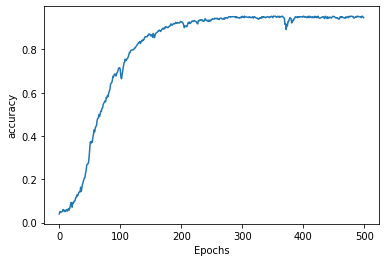

In [12]:
plot_graphs(history, 'accuracy')

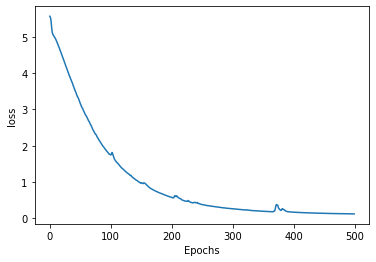

In [13]:
plot_graphs(history, 'loss')

In [17]:
seed_text = "Laurence went to dublin"
next_words = 25
  
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = model.predict_classes(token_list, verbose=0)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
    
print(seed_text)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Laurence went to dublin merry as bees round a cask miss kerrigan fainted and wine for them the her ned mchugh call call entangled entangled ned strangled pipes mchugh
